In [1]:
import numpy as np
import urllib.request
from urllib.request import urlopen
import re
from zipfile import ZipFile
from google.colab import files
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# %matplotlib inline
import pandas as pd

#classifiers from sklearn. More options here: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.linear_model import LogisticRegression #Logistic regression classifier: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
from sklearn.neighbors import KNeighborsClassifier #K-neareast neighbors classifier: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification
from sklearn.dummy import DummyClassifier #Dummy classifier (majority class): https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
from sklearn.naive_bayes import GaussianNB #Naive Bayes classifier: https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
from sklearn.tree import DecisionTreeClassifier #Decision tree classifier: https://scikit-learn.org/stable/modules/tree.html#classification
from sklearn.ensemble import RandomForestClassifier #Random Forests classifier: https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees
from sklearn.neural_network import MLPClassifier #Multi-layer perceptron classifier: https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification

#pre-processing and feature extraction
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
df = pd.read_csv('FINBERT-allData (1).csv', encoding = "ISO-8859-1")

In [8]:
df.head()

,Description,Semantic
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,neutral
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


In [9]:
df["Semantic"].value_counts()

neutral     3355
positive     971
negative     520
Name: Semantic, dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

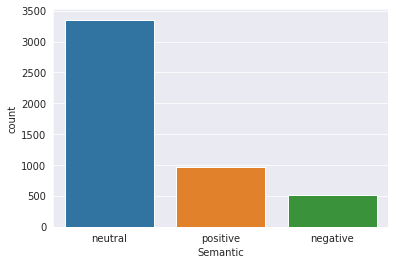

In [11]:
sns.countplot(df["Semantic"])


In [13]:
df['length']  = df['Description'].str.len()

In [ ]:
df.head()


In [15]:
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [16]:
def text_process(mess):

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # remove stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
df["Description"].head().apply(text_process)

0    [According, Gran, company, plans, move, produc...
1    [Technopolis, plans, develop, stages, area, le...
2    [international, electronic, industry, company,...
3    [new, production, plant, company, would, incre...
4    [According, company, updated, strategy, years,...
Name: Description, dtype: object

In [19]:
bagofwords_transformer = CountVectorizer(analyzer=text_process).fit(df["Description"])


In [20]:
print(len(bagofwords_transformer.vocabulary_))

12270


In [21]:
df_bow = bagofwords_transformer.transform(df['Semantic'])

In [22]:
message5 = df['Description'][4]
bow5 = bagofwords_transformer.transform([message5])
print(bow5)
print(bow5.shape)

  (0, 96)	1
  (0, 516)	2
  (0, 549)	1
  (0, 958)	1
  (0, 1589)	1
  (0, 1885)	1
  (0, 7253)	1
  (0, 8613)	1
  (0, 9320)	1
  (0, 9421)	1
  (0, 9713)	2
  (0, 9869)	1
  (0, 10351)	1
  (0, 10486)	1
  (0, 10898)	2
  (0, 11398)	1
  (0, 11585)	1
  (0, 11932)	1
  (0, 12252)	1
(1, 12270)


In [23]:
tfidf_transformer = TfidfTransformer().fit(df_bow)

In [24]:
tfidf5 = tfidf_transformer.transform(bow5)
print(tfidf5)

  (0, 12252)	0.1889822365046136
  (0, 11932)	0.1889822365046136
  (0, 11585)	0.1889822365046136
  (0, 11398)	0.1889822365046136
  (0, 10898)	0.3779644730092272
  (0, 10486)	0.1889822365046136
  (0, 10351)	0.1889822365046136
  (0, 9869)	0.1889822365046136
  (0, 9713)	0.3779644730092272
  (0, 9421)	0.1889822365046136
  (0, 9320)	0.1889822365046136
  (0, 8613)	0.1889822365046136
  (0, 7253)	0.1889822365046136
  (0, 1885)	0.1889822365046136
  (0, 1589)	0.1889822365046136
  (0, 958)	0.1889822365046136
  (0, 549)	0.1889822365046136
  (0, 516)	0.3779644730092272
  (0, 96)	0.1889822365046136


In [25]:
models = {
    "                   Logistic_Regression": LogisticRegression(),
    "        K-Nearest Neighbors_Classifier": KNeighborsClassifier(n_neighbors=9),
    "                Naive_Bayes_Classifier": MultinomialNB(),
    "              Random_Forest_Classifier": RandomForestClassifier()
}

In [27]:
pipelines={}

X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['Semantic'], test_size=0.2, random_state=101)

In [28]:
def train(X_train, y_train):
    for name, model in models.items():
    
        print(name+"_pipeline created!")
        model_pipeline = Pipeline([
        
        ('bagofwords', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
        (name, model),# train on TF-IDF vectors w/ classifier
        
        ])
    
        model_pipeline.fit(X_train, y_train)
        print(name+"_pipeline trained!")
    
        pipelines.update({name: model_pipeline})

In [42]:
from sklearn.metrics import f1_score
def test(X_train, X_test, y_train, y_test):
    
    for name, model in pipelines.items():
        print(name)
        print("--------------------"*3)
        print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
        print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
        print("--------------------"*3)
        print('\n')  

In [37]:
def evalModel(name, model):
    print(name)
    print("\nConfusion Matrix")
    predictions = model.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print("\nClassifiation Report")
    print(classification_report(y_test,predictions))
    print("==="*40)

In [38]:
pipelines={}

X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['Semantic'], test_size=0.2, random_state=101)

In [39]:
train(X_train, y_train)

                   Logistic_Regression_pipeline created!
                   Logistic_Regression_pipeline trained!
        K-Nearest Neighbors_Classifier_pipeline created!
        K-Nearest Neighbors_Classifier_pipeline trained!
                Naive_Bayes_Classifier_pipeline created!
                Naive_Bayes_Classifier_pipeline trained!
              Random_Forest_Classifier_pipeline created!
              Random_Forest_Classifier_pipeline trained!


In [43]:
test(X_train, X_test, y_train, y_test)

Training Accuracy: 0.86378
------------------------------------------------------------


        K-Nearest Neighbors_Classifier
------------------------------------------------------------
Testing Accuracy: 0.78041
Training Accuracy: 0.79386
------------------------------------------------------------


                Naive_Bayes_Classifier
------------------------------------------------------------
Testing Accuracy: 0.74639
Training Accuracy: 0.77477
------------------------------------------------------------


              Random_Forest_Classifier
------------------------------------------------------------
Testing Accuracy: 0.83608
Training Accuracy: 1.00000
------------------------------------------------------------




In [45]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
result = classification_report(y_test, predictions, target_names=df['Semantic'])

print(result)

NameError: ignored